# Лабораторная работа 4
# САФИН РАМАЗ

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
warnings.filterwarnings("ignore", message="'squared' is deprecated")

In [18]:
data = pd.read_csv('web_traffic.tsv',delimiter='\t', names=['hour','n_requests'])
input_var = 'hour'
target_var = 'n_requests'
hours_data = data[input_var]
requests_data = data[target_var]
filtered_data = data.dropna()

In [19]:
req_data = pd.notna(requests_data)
print(hours_data[req_data])

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64


In [20]:
hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]
print(hours_data[:25], requests_data[:25])

0      1
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
23    24
24    25
25    26
26    27
Name: hour, dtype: int64 0     2272.0
2     1386.0
3     1365.0
4     1488.0
5     1337.0
6     1883.0
7     2283.0
8     1335.0
9     1025.0
10    1139.0
11    1477.0
12    1203.0
13    1311.0
14    1299.0
15    1494.0
16    1159.0
17    1365.0
18    1272.0
19    1246.0
20    1071.0
21    1876.0
23    1410.0
24     925.0
25    1533.0
26    2104.0
Name: n_requests, dtype: float64


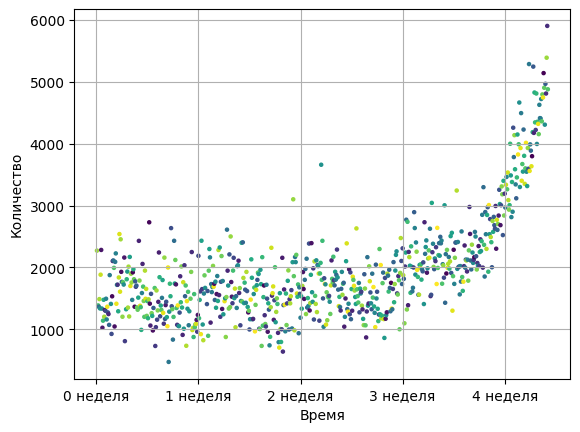

In [21]:
colors = np.random.rand(len(hours_data)) 
plt.scatter(hours_data, requests_data, s=5, c=colors, cmap='viridis')
plt.xlabel('Время')
plt.ylabel('Количество')
plt.grid()
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])
plt.autoscale(tight=False)
plt.show()

In [22]:
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
print('Параметры модели {}'.format(f2p))
f2p_1, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 1, full=True)
print(f'Параметры модели (1-степень) {f2p_1}')
f2p_2, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 2, full=True)
print(f'Параметры модели (2-степень) {f2p_2}')
f2p_3, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)
print(f'Параметры модели (3-степень) {f2p_3}')

Параметры модели [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Параметры модели (1-степень) [  2.59619213 989.02487106]
Параметры модели (2-степень) [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Параметры модели (3-степень) [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]


In [23]:
f2p_5, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 5, full=True)
print(f'Параметры модели 5-степень {f2p_5}')
f2p_10, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 10, full=True)
print(f'Параметры модели 10-степень {f2p_10}')
f2p_20, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 20, full=True)
print(f'Параметры модели 20-степень {f2p_20}')

Параметры модели 5-степень [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
Параметры модели 10-степень [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
Параметры модели 20-степень [ 4.83071915e-47 -3.18244218e-43  8.87194188e-40 -1.31482065e-36
  9.87781170e-34 -8.55557930e-32 -5.09634495e-28  3.80309530e-25
  4.98684409e-23 -2.74825101e-19  2.35469919e-16 -1.17296855e-13
  3.93128299e-11 -9.23445356e-09  1.52941231e-06 -1.76097237e-04
  1.36396130e-02 -6.69559313e-01  1.86541244e+01 -2.35173996e+02
  2.33820210e+03]


In [24]:
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []
r2_array_1.append(r2_score(requests_data,  fx_1(hours_data)))
rmse_1 = mean_squared_error(requests_data, fx_1(hours_data), squared=False)
mse_1 = mean_squared_error(requests_data,  fx_1(hours_data), squared=True)
mae_1 = mean_absolute_error(requests_data,  fx_1(hours_data))
print(f'r2_array = {r2_array_1}, mse={mse_1}, rmse={rmse_1}, mae={mae_1}')

r2_array = [0.41632369094258925], mse=431822.812707181, rmse=657.1322642415155, mae=504.8810103756525


In [25]:
fx_2 = np.poly1d(f2p_2)
r2_array_2 = []
r2_array_2.append(r2_score(requests_data,  fx_2(hours_data)))
rmse_2 = mean_squared_error(requests_data, fx_2(hours_data), squared=False)
mse_2 = mean_squared_error(requests_data,  fx_2(hours_data), squared=True)
mae_2 = mean_absolute_error(requests_data,  fx_2(hours_data))
print(f'r2_array = {r2_array_2}, mse={mse_2}, rmse={rmse_2}, mae={mae_2}')

r2_array = [0.6690122985058977], mse=244875.52092269278, rmse=494.84898799804853, mae=389.2663189980563


In [26]:
fx_3 = np.poly1d(f2p_3)
r2_array_3 = []
r2_array_3.append(r2_score(requests_data,  fx_3(hours_data)))
rmse_3 = mean_squared_error(requests_data, fx_3(hours_data), squared=False)
mse_3 = mean_squared_error(requests_data,  fx_3(hours_data), squared=True)
mae_3 = mean_absolute_error(requests_data,  fx_3(hours_data))
print(f'r2_array={r2_array_3}, mse={mse_3}, rmse={rmse_3}, mae={mae_3}')

r2_array=[0.7437366099834488], mse=189592.03269622484, rmse=435.42167228587147, mae=344.1036970490545


In [27]:
fx_5 = np.poly1d(f2p_5)
r2_array_5 = []
r2_array_5.append(r2_score(requests_data,  fx_5(hours_data)))
rmse_5 = mean_squared_error(requests_data, fx_5(hours_data), squared=False)
mse_5 = mean_squared_error(requests_data,  fx_5(hours_data), squared=True)
mae_5 = mean_absolute_error(requests_data,  fx_5(hours_data))
print(f'r2_array={r2_array_5}, mse={mse_5}, rmse={rmse_5}, mae={mae_5}')

r2_array=[0.7711107518847923], mse=169339.7477090661, rmse=411.5091101167338, mae=325.1390989686412


In [28]:
fx_10 = np.poly1d(f2p_10)
r2_array_10 = []
r2_array_10.append(r2_score(requests_data,  fx_10(hours_data)))
rmse_10 = mean_squared_error(requests_data, fx_10(hours_data), squared=False)
mse_10 = mean_squared_error(requests_data,  fx_10(hours_data), squared=True)
mae_10 = mean_absolute_error(requests_data,  fx_10(hours_data))
print(f'r2_array={r2_array_10}, mse={mse_10}, rmse={rmse_10}, mae={mae_10}')

r2_array=[0.7757493961876589], mse=165907.92702536078, rmse=407.3179679628199, mae=319.04082734290245


In [29]:
fx_20 = np.poly1d(f2p_20)
r2_array_20 = []
r2_array_20.append(r2_score(requests_data,  fx_20(hours_data)))
rmse_20 = mean_squared_error(requests_data, fx_20(hours_data), squared=False)
mse_20 = mean_squared_error(requests_data,  fx_20(hours_data), squared=True)
mae_20 = mean_absolute_error(requests_data,  fx_20(hours_data))
print(f'r2_array={r2_array_20}, mse={mse_20}, rmse={rmse_20}, mae={mae_20}')

r2_array=[0.7967407121973749], mse=150377.8652752457, rmse=387.7858497614962, mae=300.73473725624956


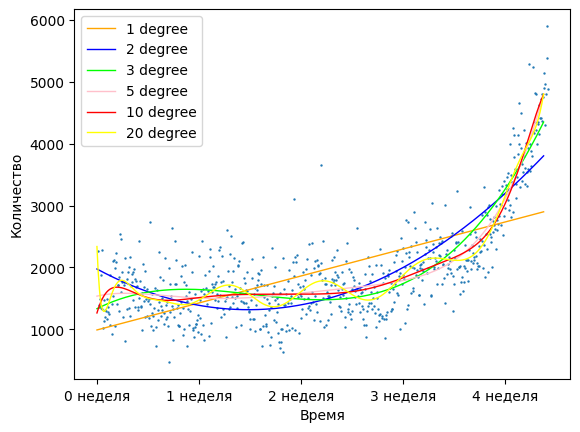

In [30]:
plt.scatter(hours_data, requests_data, s=0.5)
plt.xlabel('Время')
plt.ylabel('Количество')
plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y_1 = fx_1(f2x)
plt.plot(f2x, f2y_1, linewidth=1.0, color='orange', label = '1 degree')
f2y_2 = fx_2(f2x)
plt.plot(f2x, f2y_2, linewidth=1.0, color='blue', label = '2 degree')
f2y_3 = fx_3(f2x)
plt.plot(f2x, f2y_3, linewidth=1.0, color='lime', label = '3 degree')
f2y_5 = fx_5(f2x)
plt.plot(f2x, f2y_5, linewidth=1.0, color='pink', label = '5 degree')
f2y_10 = fx_10(f2x)
plt.plot(f2x, f2y_10, linewidth=1.0, color='red', label = '10 degree')
f2y_20 = fx_20(f2x)
plt.plot(f2x, f2y_20, linewidth=1.0, color='yellow', label = '20 degree')
plt.autoscale(tight=False)
plt.legend()
plt.show()

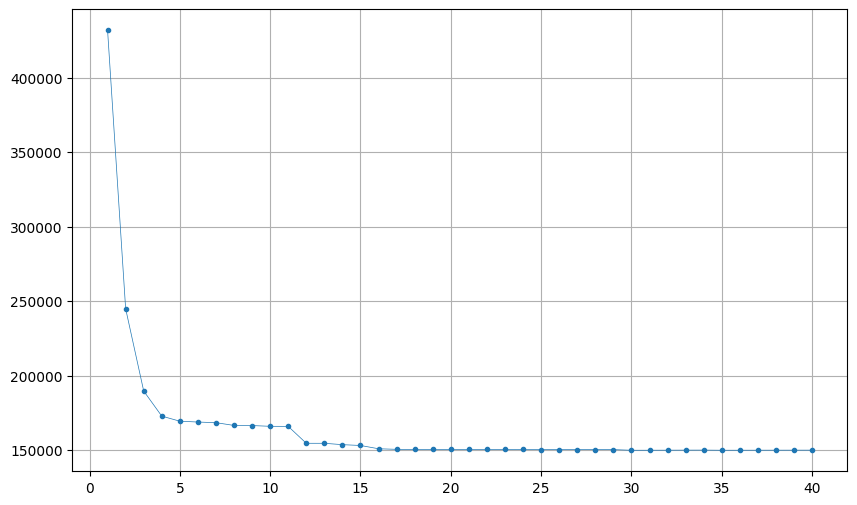

In [31]:
pol_list = []
mse_list = []
for i in range(1, 41):
    pol_list.append(i)
    f2p_i, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, i, full=True)
    fx_i = np.poly1d(f2p_i)
    mse_i = mean_squared_error(requests_data,  fx_i(hours_data), squared=True)
    mse_list.append(mse_i)
plt.figure(figsize=(10, 6))
plt.plot(pol_list, mse_list, marker='.', linewidth=0.5)
plt.grid(True)
plt.show()

In [32]:
def get_mse(y_true, y_pred):
    true_val = []
    pred_val = []
    pred_val_raw = y_pred
    for el in y_true:
        true_val.append(el)
    for el in pred_val_raw:
        pred_val.append(el)
    n = len(true_val)
    sum = 0
    for i in range(n):
        sum += (true_val[i] - pred_val[i])**2
    return (sum / n)
start_time = time.time()
MSE_func = get_mse(requests_data, fx_20(hours_data))
print(f'MSE: {MSE_func}')

MSE: 150377.86527524583
